# Data Science Seed \#1 - Coltivare competenze! 
https://www.meetup.com/Data-Science-Seed-Meetup-Genova/events/251410003

by Stefania Delprete, TOP-IX  

https://www.linkedin.com/in/astrastefania   
https://twitter.com/astrastefania  
.  
.  
.  
.  

---

## Esploriamo open data di Genova

http://dati.comune.genova.it

#### Produzione energia da fonti rinnovabili ComGE
http://dati.comune.genova.it/dataset/produzione-energia-da-fonti-rinnovabili-edifici-del-comune-di-genova-comge

Di seguito si riporta la descrizione dei campi presenti all'interno del Dataset:  
SETTORE: tipologia di utenza descritta. Con la dicitura 'MUNICIPALE' si indicano gli impianti installati su edifici di proprietà della Pubblica Amministrazione;  
ID IMPIANTO: codice identificativo dell'impianto attribuito dal sistema di Gestione delle Anagrafiche Uniche Degli Impianti di produzione e delle relative unità (GAUDÌ);  
INDIRIZZO: indirizzo identificativo dell'edificio in cui è ubicato l'impianto;  
TIPO IMPIANTO: tipologia di impianto a fonti rinnovabili installato (solare termico, fotovoltaico, solar cooling);  
POTENZA: Potenza di picco dell'impianto fotovoltaico installato, espresso in kW; 
SUPERFICIE: Superficie lorda dell'impianto considerato, espressa in mq;  
ENERGIA ELETTRICA PRODOTTA: Energia elettrica annualmente prodotta dall'impianto, espressa i kWhe/anno (valore stimato);  
ENERGIA TERMICA PRODOTTA: Energia termica annualmente  prodotta dall'impianto, espressa i kWh/anno (valore stimato).  


### Pandas

In [1]:
import pandas as pd

In [2]:
# sep = ';'

rinnovabili = pd.read_csv('data/Rinnovabili_ComGE_1.csv', sep = ';')

In [3]:
rinnovabili.head()

,Settore,Id. Impianto,Indirizzo,Tipo di Impianto,Potenza [kW],Superficie [mq],Energia Elettrica Prodotta [kWh/anno],Energia Termica Prodotta [kWh/anno]
0,Municipale,IM_0017951,Via Serino 30,Fotovoltaico,"1,8",14,1.838,NaN
1,Municipale,NaN,Via Pavese,Fotovoltaico,13,207,12.500,NaN
2,Municipale,IM_814282,Via Giulio Pastore 62,Fotovoltaico,"2,1",21,2.174,NaN
3,Municipale,IM_0814291,Via Giulio Pastore 74,Fotovoltaico,"2,1",21,2.174,NaN
4,Municipale,IM_0829368,Via Giulio Pastore 144,Fotovoltaico,"2,1",21,2.174,NaN


In [4]:
type(rinnovabili)

pandas.core.frame.DataFrame

In [5]:
rinnovabili.info() # notiano le diverse quantità di valori non nulli

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 8 columns):
Settore                                  56 non-null object
Id. Impianto                             34 non-null object
Indirizzo                                56 non-null object
Tipo di Impianto                         56 non-null object
 Potenza [kW]                            41 non-null object
Superficie [mq]                          56 non-null object
Energia Elettrica Prodotta [kWh/anno]    41 non-null float64
Energia Termica Prodotta [kWh/anno]      15 non-null float64
dtypes: float64(2), object(6)
memory usage: 3.6+ KB


In [6]:
rinnovabili.shape

(56, 8)

In [7]:
rinnovabili.columns # notiamo gli spazi nei nomi delle colonne

Index(['Settore', 'Id. Impianto', 'Indirizzo', 'Tipo di Impianto',
       ' Potenza [kW] ', 'Superficie [mq]',
       'Energia Elettrica Prodotta [kWh/anno]',
       'Energia Termica Prodotta [kWh/anno]'],
      dtype='object')

In [8]:
rinnovabili.columns = ['settore', 'id', 'indirizzo', 'tipo', 'pot', 'sup', 'en_el', 'en_term' ]

In [9]:
rinnovabili.head()

,settore,id,indirizzo,tipo,pot,sup,en_el,en_term
0,Municipale,IM_0017951,Via Serino 30,Fotovoltaico,"1,8",14,1.838,NaN
1,Municipale,NaN,Via Pavese,Fotovoltaico,13,207,12.500,NaN
2,Municipale,IM_814282,Via Giulio Pastore 62,Fotovoltaico,"2,1",21,2.174,NaN
3,Municipale,IM_0814291,Via Giulio Pastore 74,Fotovoltaico,"2,1",21,2.174,NaN
4,Municipale,IM_0829368,Via Giulio Pastore 144,Fotovoltaico,"2,1",21,2.174,NaN


In [10]:
rinnovabili['settore'].value_counts()

Municipale    56
Name: settore, dtype: int64

In [11]:
rinnovabili['tipo'].value_counts()

Fotovoltaico      41
Solare Termico    14
Solar Cooling      1
Name: tipo, dtype: int64

In [12]:
rinnovabili['tipo'].unique()

array(['Fotovoltaico', 'Solare Termico', 'Solar Cooling'], dtype=object)

In [13]:
rinnovabili['pot'].value_counts().head() 

20      8
2,1     4
19,7    3
19,8    2
19,5    2
Name: pot, dtype: int64

In [14]:
rinnovabili.describe()

,en_el,en_term
count,41.000000,15.000000
mean,18.801463,66.113867
std,27.152256,42.528191
min,1.575000,11.436000
25%,7.244000,37.167000
50%,20.412000,53.368000
75%,21.000000,99.112000
max,179.550000,148.668000


In [15]:
type(rinnovabili['pot'][3])

str

### Matplotlib

In [16]:
import matplotlib.pyplot as plt

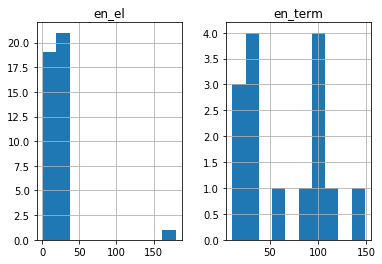

In [17]:
rinnovabili.hist()
plt.show()

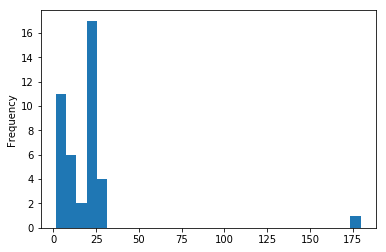

In [18]:
rinnovabili['en_el'].plot.hist(bins=30)
plt.show()

### Seaborn

In [19]:
import seaborn as sns

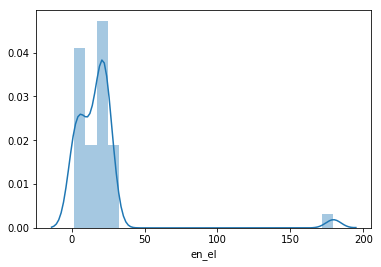

In [20]:
# Possiamo togliere i valori nulli dal nosro DataFrame
# Di defaulf mostra la KDE (Kernel Density Estimation)

sns.distplot(rinnovabili['en_el'].dropna())
plt.show()

In [21]:
rinnovabili_ = rinnovabili[rinnovabili['en_el'] < 50]

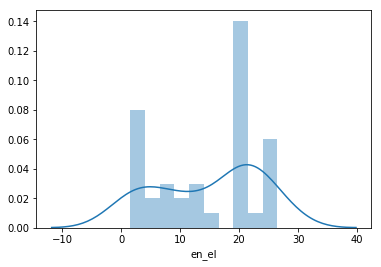

In [22]:
sns.distplot(rinnovabili_['en_el'].dropna(), bins = 10)
plt.show()

In [23]:
help(sns.distplot)

Help on function distplot in module seaborn.distributions:

distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
    Flexibly plot a univariate distribution of observations.
    
    This function combines the matplotlib ``hist`` function (with automatic
    calculation of a good default bin size) with the seaborn :func:`kdeplot`
    and :func:`rugplot` functions. It can also fit ``scipy.stats``
    distributions and plot the estimated PDF over the data.
    
    Parameters
    ----------
    
    a : Series, 1d-array, or list.
        Observed data. If this is a Series object with a ``name`` attribute,
        the name will be used to label the data axis.
    bins : argument for matplotlib hist(), or None, optional
        Specification of hist bins, or None to use Freedman-Diaconis rule.
    hist : bool, optional
        Whether to plot 

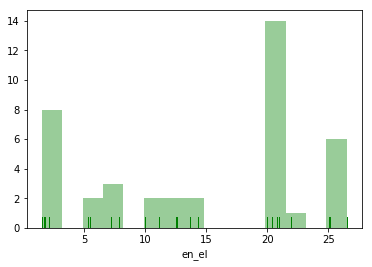

In [24]:
sns.distplot(rinnovabili_['en_el'], bins = 15, kde = False, rug = True, color = 'green')
plt.show()

---

## Free wifi

http://dati.comune.genova.it/dataset/freewi-figenova

Altri .csv  
http://dati.comune.genova.it/search/field_resources%253Afield_format/csv-14/field_topic/istruzione-cultura-e-sport-28/type/dataset?sort_by=changed